In [105]:
!pip install missingno

In [106]:
#importing the necesary packages
import pandas as pd
import numpy as np
import missingno as msno
import warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report, ConfusionMatrixDisplay
from scipy.stats import randint
import xgboost as xgb
from imblearn.over_sampling import SMOTE


In [107]:
import sklearn
print(sklearn.__version__)

1.2.2


In [108]:
df = pd.read_csv('WA_Fn-UseC_-Telco-Customer-Churn.csv')

In [109]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [110]:
df.shape

(7043, 21)

In [111]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [112]:
df = df.drop(['customerID'] ,axis= 1)

In [113]:
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [114]:
#renaming columns for better understanding
df = df.rename(columns={'Partner':'Marital_status','tenure':'Tenure_In_Months'})

In [115]:
df.head()

,gender,SeniorCitizen,Marital_status,Dependents,Tenure_In_Months,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [116]:
#checking null values
df.isnull().sum()

gender              0
SeniorCitizen       0
Marital_status      0
Dependents          0
Tenure_In_Months    0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [117]:
#converting TotalCarges column to numeric
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')

In [118]:
#checking data types
df.dtypes

gender               object
SeniorCitizen         int64
Marital_status       object
Dependents           object
Tenure_In_Months      int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges        float64
Churn                object
dtype: object

In [119]:
df.isnull().sum()

gender               0
SeniorCitizen        0
Marital_status       0
Dependents           0
Tenure_In_Months     0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

In [120]:
#imputing these values in the totalcharges column with mean of this coumn--assumption
df=df.fillna(df['TotalCharges'].mean())

In [121]:
df.isnull().sum()

gender              0
SeniorCitizen       0
Marital_status      0
Dependents          0
Tenure_In_Months    0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

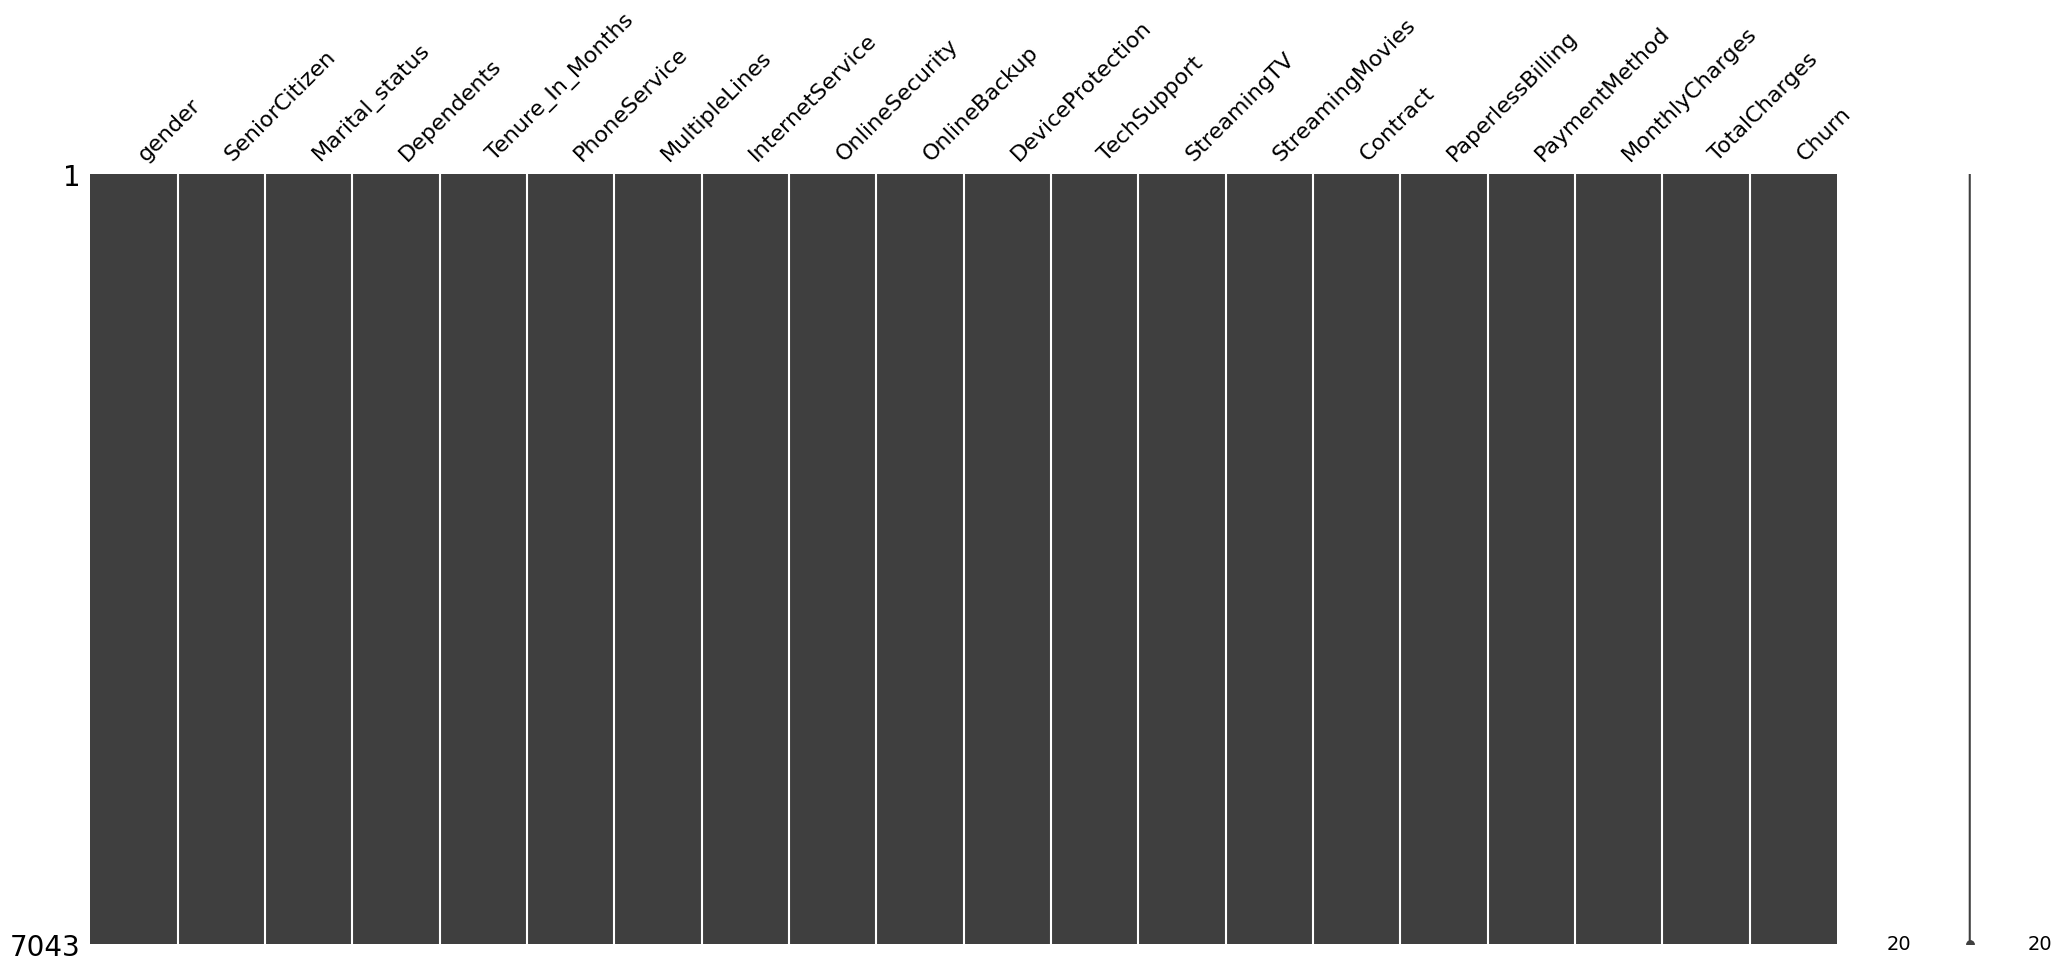

In [122]:
#visualizing missing values
msno.matrix(df)
plt.show()

In [123]:
df.describe()

,SeniorCitizen,Tenure_In_Months,MonthlyCharges,TotalCharges
count,7043.000000,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692,2283.300441
std,0.368612,24.559481,30.090047,2265.000258
min,0.000000,0.000000,18.250000,18.800000
25%,0.000000,9.000000,35.500000,402.225000
50%,0.000000,29.000000,70.350000,1400.550000
75%,0.000000,55.000000,89.850000,3786.600000
max,1.000000,72.000000,118.750000,8684.800000


# Visualization

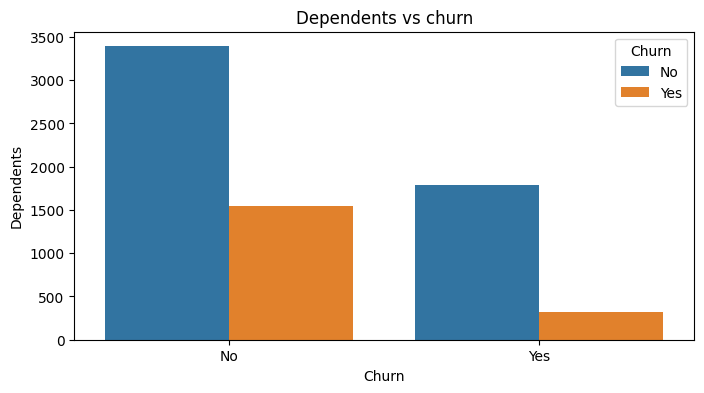

In [124]:
plt.figure(figsize=(8, 4))
sns.countplot(x='Dependents', hue='Churn', data=df, palette='tab10')

# Setting the labels and title
plt.xlabel('Churn')
plt.ylabel('Dependents')
 
plt.title('Dependents vs churn')
plt.show()

Customers without dependents are more likely to churn

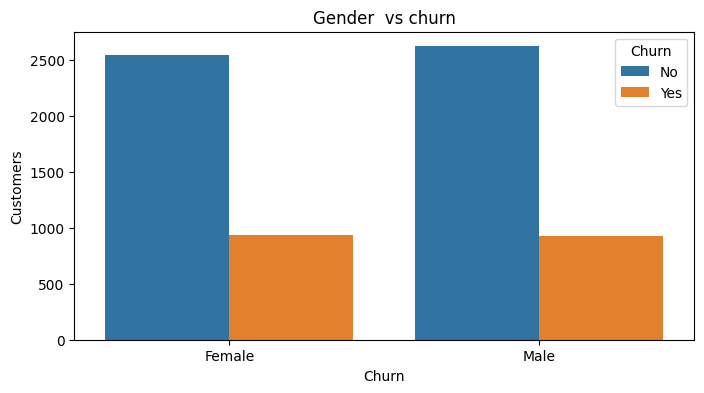

In [125]:
plt.figure(figsize=(8, 4))
ax = sns.countplot(x='gender', hue='Churn', data=df, palette='tab10')

# Setting the labels and title
plt.xlabel('Churn')
plt.ylabel('Customers')
 
plt.title('Gender  vs churn')
plt.show()

The churn rate appears to be relatively consistent across different genders, showing little   difference between them.

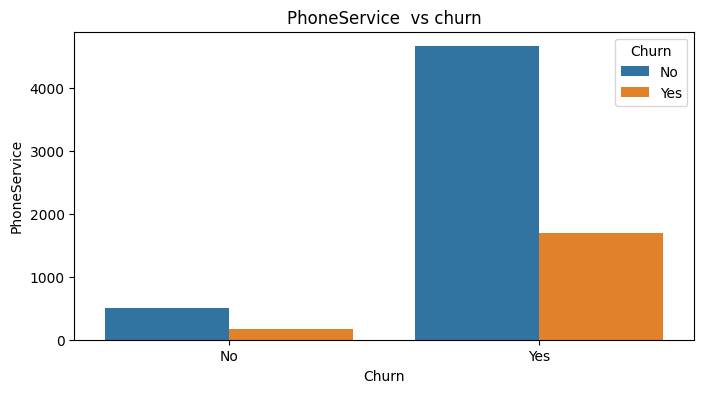

In [126]:
plt.figure(figsize=(8, 4))
ax = sns.countplot(x='PhoneService', hue='Churn', data=df, palette='tab10')

# Setting the labels and title
plt.xlabel('Churn')
plt.ylabel('PhoneService')
 
plt.title('PhoneService  vs churn')
plt.show()

customers with phone service subscription are likely to churn

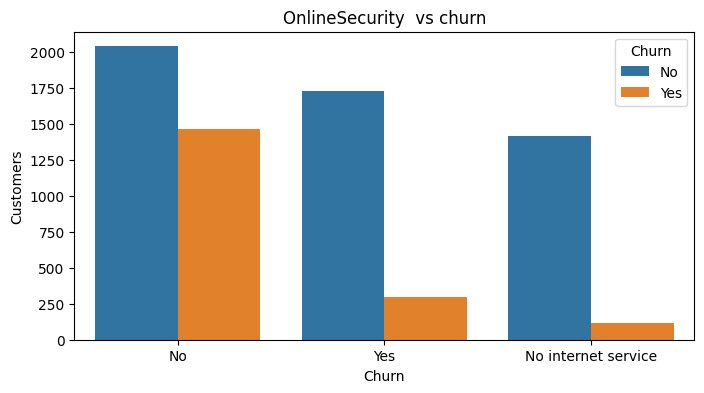

In [127]:
plt.figure(figsize=(8, 4))
ax = sns.countplot(x='OnlineSecurity', hue='Churn', data=df, palette='tab10')

# Setting the labels and title
plt.xlabel('Churn')
plt.ylabel('Customers')
 
plt.title('OnlineSecurity  vs churn')
plt.show()

Most of the customers tend to churn in absence of online security

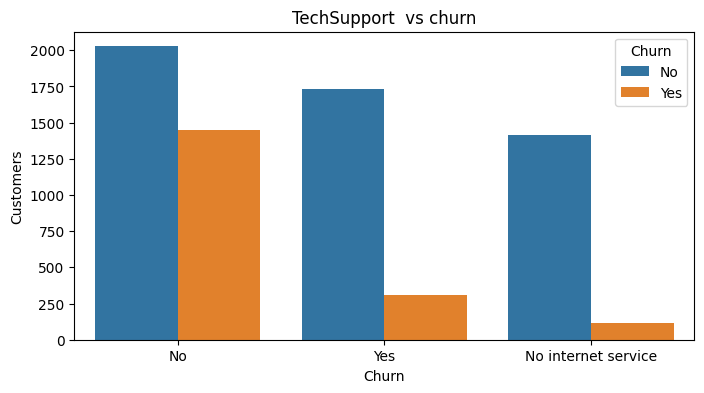

In [128]:
plt.figure(figsize=(8, 4))
ax = sns.countplot(x='TechSupport', hue='Churn', data=df, palette='tab10')

# Setting the labels and title
plt.xlabel('Churn')
plt.ylabel('Customers')
plt.xticks()
 
plt.title('TechSupport  vs churn')
plt.show()

Customers who are not offfered techsupport are most likey to churn

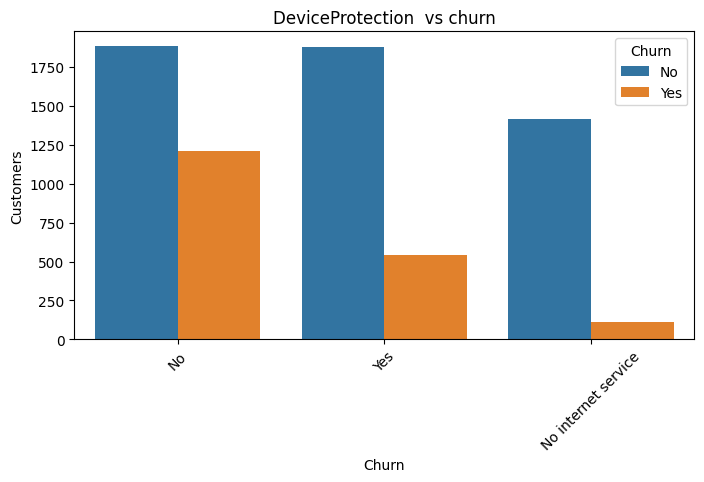

In [129]:
plt.figure(figsize=(8, 4))
ax = sns.countplot(x='DeviceProtection', hue='Churn', data=df, palette='tab10')

# Setting the labels and title
plt.xlabel('Churn')
plt.ylabel('Customers')
plt.xticks(rotation = 45)

plt.title('DeviceProtection  vs churn')
plt.show()

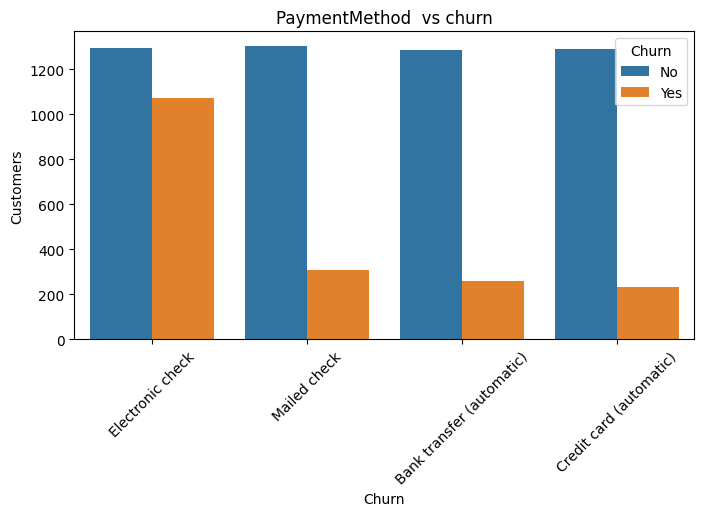

In [130]:
plt.figure(figsize=(8, 4))
ax = sns.countplot(x='PaymentMethod', hue='Churn', data=df, palette='tab10')

# Setting the labels and title
plt.xlabel('Churn')
plt.ylabel('Customers')
plt.xticks(rotation = 45)
 
plt.title('PaymentMethod  vs churn')
plt.show()

Most customers who churn uses Electronic check as their payment method

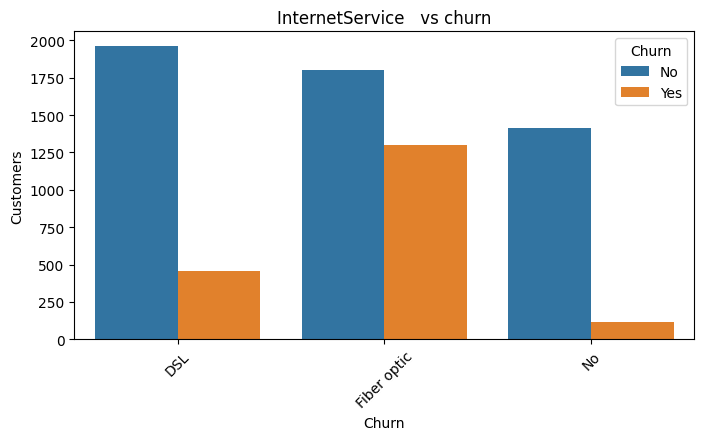

In [131]:
plt.figure(figsize=(8, 4))
ax = sns.countplot(x='InternetService', hue='Churn', data=df, palette='tab10')

# Setting the labels and title
plt.xlabel('Churn')
plt.ylabel('Customers')
plt.xticks(rotation = 45)
 
plt.title('InternetService   vs churn')
plt.show()

Most customers who churn uses Fiber optic internet service

In [132]:
# import plotly.express as px
# fig = px.bar(df, x="InternetService", y="TotalCharges", color="gender", facet_row="Churn")
# fig.show()

# Preprocessing

In [133]:
df.head()

,gender,SeniorCitizen,Marital_status,Dependents,Tenure_In_Months,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [134]:
non_numeric_cols = list(df.select_dtypes(exclude=['number']).columns)
non_numeric_cols

['gender',
 'Marital_status',
 'Dependents',
 'PhoneService',
 'MultipleLines',
 'InternetService',
 'OnlineSecurity',
 'OnlineBackup',
 'DeviceProtection',
 'TechSupport',
 'StreamingTV',
 'StreamingMovies',
 'Contract',
 'PaperlessBilling',
 'PaymentMethod',
 'Churn']

In [135]:
non_numeric_cols.remove("Churn")

In [136]:
non_numeric_cols

['gender',
 'Marital_status',
 'Dependents',
 'PhoneService',
 'MultipleLines',
 'InternetService',
 'OnlineSecurity',
 'OnlineBackup',
 'DeviceProtection',
 'TechSupport',
 'StreamingTV',
 'StreamingMovies',
 'Contract',
 'PaperlessBilling',
 'PaymentMethod']

In [137]:
df = pd.get_dummies(df, columns=non_numeric_cols, drop_first=True)

In [138]:
df.head()

,SeniorCitizen,Tenure_In_Months,MonthlyCharges,TotalCharges,Churn,gender_Male,Marital_status_Yes,Dependents_Yes,PhoneService_Yes,MultipleLines_No phone service,...,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0,1,29.85,29.85,No,False,True,False,False,True,...,False,False,False,False,False,False,True,False,True,False
1,0,34,56.95,1889.50,No,True,False,False,True,False,...,False,False,False,False,True,False,False,False,False,True
2,0,2,53.85,108.15,Yes,True,False,False,True,False,...,False,False,False,False,False,False,True,False,False,True
3,0,45,42.30,1840.75,No,True,False,False,False,True,...,False,False,False,False,True,False,False,False,False,False
4,0,2,70.70,151.65,Yes,False,False,False,True,False,...,False,False,False,False,False,False,True,False,True,False


In [139]:
df.iloc[:, :4].describe()

,SeniorCitizen,Tenure_In_Months,MonthlyCharges,TotalCharges
count,7043.000000,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692,2283.300441
std,0.368612,24.559481,30.090047,2265.000258
min,0.000000,0.000000,18.250000,18.800000
25%,0.000000,9.000000,35.500000,402.225000
50%,0.000000,29.000000,70.350000,1400.550000
75%,0.000000,55.000000,89.850000,3786.600000
max,1.000000,72.000000,118.750000,8684.800000


<Axes: >

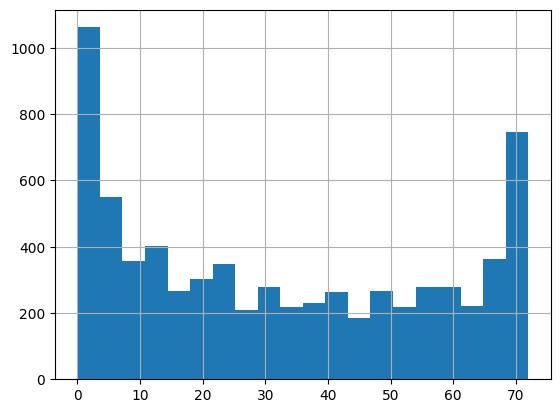

In [140]:
df['Tenure_In_Months'].hist(bins=20)

<Axes: >

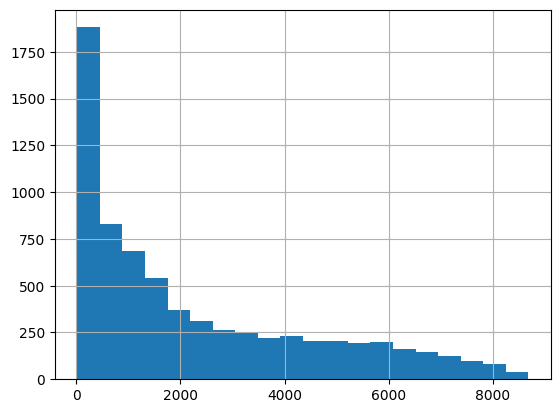

In [141]:
df['TotalCharges'].hist(bins=20)

<Axes: >

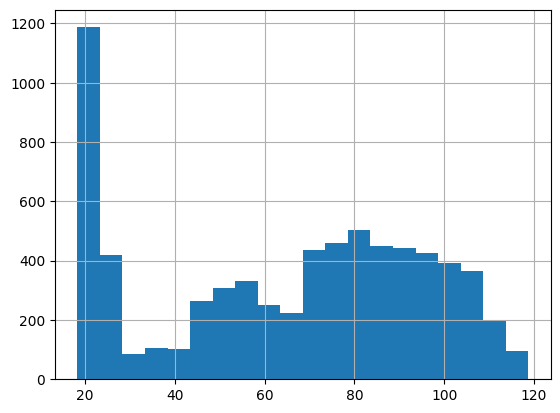

In [142]:
df['MonthlyCharges'].hist(bins=20)

In [143]:
df['Churn'].value_counts(normalize=True)

Churn
No     0.73463
Yes    0.26537
Name: proportion, dtype: float64

In [144]:
#scaling

In [145]:
df['Churn'] = df['Churn'].replace({"No": 0, "Yes":1})

In [146]:
df.head()

,SeniorCitizen,Tenure_In_Months,MonthlyCharges,TotalCharges,Churn,gender_Male,Marital_status_Yes,Dependents_Yes,PhoneService_Yes,MultipleLines_No phone service,...,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0,1,29.85,29.85,0,False,True,False,False,True,...,False,False,False,False,False,False,True,False,True,False
1,0,34,56.95,1889.50,0,True,False,False,True,False,...,False,False,False,False,True,False,False,False,False,True
2,0,2,53.85,108.15,1,True,False,False,True,False,...,False,False,False,False,False,False,True,False,False,True
3,0,45,42.30,1840.75,0,True,False,False,False,True,...,False,False,False,False,True,False,False,False,False,False
4,0,2,70.70,151.65,1,False,False,False,True,False,...,False,False,False,False,False,False,True,False,True,False


In [147]:
X = df.drop('Churn', axis=1)
y = df['Churn']

In [148]:
## Train Test Split data

In [149]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

In [150]:
logit_model = LogisticRegression()

In [151]:
logit_model.fit(X_train,y_train)

LogisticRegression()

In [152]:
y_pred = logit_model.predict(X_test)

In [153]:
accuracy = accuracy_score(y_test, y_pred)


In [154]:
print("Accuracy:", accuracy)

Accuracy: 0.801277501774308


In [155]:
confusion_matrix(y_test, y_pred)

array([[934, 101],
       [179, 195]], dtype=int64)

In [156]:
#Creating an XGBoost classifier
model = xgb.XGBClassifier()

#Training the model on the training data
model.fit(X_train, y_train)

#Making predictions on the test set
predictions = model.predict(X_test)

#Calculating accuracy
accuracy = accuracy_score(y_test, predictions)

print("Accuracy:", accuracy)
print("\nClassification Report:")
print(classification_report(y_test, predictions))

Accuracy: 0.7899219304471257

Classification Report:
              precision    recall  f1-score   support

           0       0.84      0.88      0.86      1035
           1       0.62      0.55      0.58       374

    accuracy                           0.79      1409
   macro avg       0.73      0.71      0.72      1409
weighted avg       0.78      0.79      0.79      1409



In [157]:
confusion_matrix(y_test, predictions)

array([[909, 126],
       [170, 204]], dtype=int64)

In [158]:
# import library
from imblearn.over_sampling import RandomOverSampler

ros = RandomOverSampler(random_state=42)

In [159]:
oversample = SMOTE()
X, y = oversample.fit_resample(X, y)

In [160]:
y.value_counts()

Churn
0    5174
1    5174
Name: count, dtype: int64

In [161]:
X.head()

,SeniorCitizen,Tenure_In_Months,MonthlyCharges,TotalCharges,gender_Male,Marital_status_Yes,Dependents_Yes,PhoneService_Yes,MultipleLines_No phone service,MultipleLines_Yes,...,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0,1,29.85,29.85,False,True,False,False,True,False,...,False,False,False,False,False,False,True,False,True,False
1,0,34,56.95,1889.50,True,False,False,True,False,False,...,False,False,False,False,True,False,False,False,False,True
2,0,2,53.85,108.15,True,False,False,True,False,False,...,False,False,False,False,False,False,True,False,False,True
3,0,45,42.30,1840.75,True,False,False,False,True,False,...,False,False,False,False,True,False,False,False,False,False
4,0,2,70.70,151.65,False,False,False,True,False,False,...,False,False,False,False,False,False,True,False,True,False


In [162]:
X.shape

(10348, 30)

In [163]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

In [164]:
logit_model = LogisticRegression()

logit_model.fit(X_train,y_train)

LogisticRegression()

In [165]:
y_pred = logit_model.predict(X_test)

In [166]:
confusion_matrix(y_test, y_pred)

array([[787, 248],
       [199, 836]], dtype=int64)

In [167]:
rf = RandomForestClassifier()
rf.fit(X_train, y_train)

RandomForestClassifier()

In [168]:
y_pred = rf.predict(X_test)

In [169]:
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.8483091787439614


In [170]:
param_dist = {'n_estimators': randint(50,500),
              'max_depth': randint(1,20)}

# Create a random forest classifier
rf = RandomForestClassifier()

# Use random search to find the best hyperparameters
rand_search = RandomizedSearchCV(rf, 
                                 param_distributions = param_dist, 
                                 n_iter=5, 
                                 cv=5)

# Fit the random search object to the data
rand_search.fit(X_train, y_train)

RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(), n_iter=5,
                   param_distributions={'max_depth': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x0000026A32D098D0>,
                                        'n_estimators': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x0000026A33C43AD0>})

In [171]:
# Create a variable for the best model
best_rf = rand_search.best_estimator_

# Print the best hyperparameters
print('Best hyperparameters:',  rand_search.best_params_)

Best hyperparameters: {'max_depth': 19, 'n_estimators': 274}


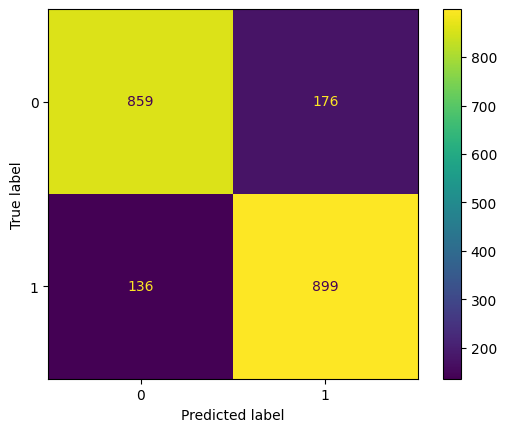

In [172]:
# Generate predictions with the best model
y_pred = best_rf.predict(X_test)

# Create the confusion matrix
cm = confusion_matrix(y_test, y_pred)

ConfusionMatrixDisplay(confusion_matrix=cm).plot();

### Features Importance

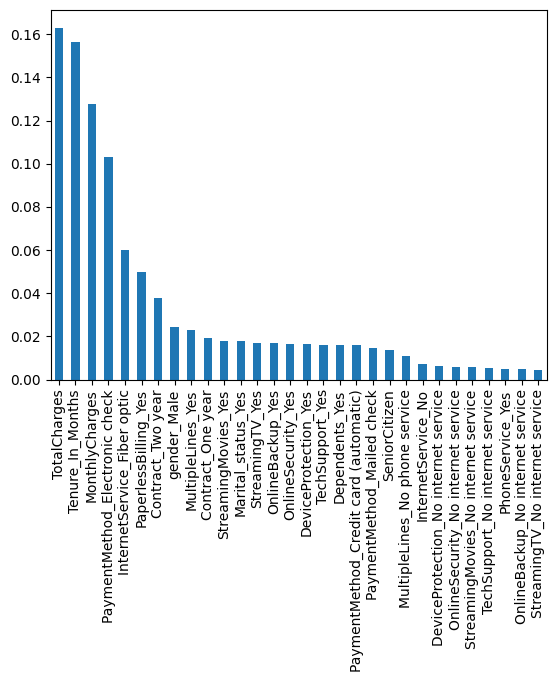

In [177]:
# Create a series containing feature importances from the model and feature names from the training data
feature_importances = pd.Series(best_rf.feature_importances_, index=X_train.columns).sort_values(ascending=False)

# Plot a simple bar chart
feature_importances.plot.bar();

In [174]:
from imblearn.ensemble import BalancedBaggingClassifier
from sklearn.tree import DecisionTreeClassifier
#Create an instance
classifier = BalancedBaggingClassifier(base_estimator=DecisionTreeClassifier(),
                                sampling_strategy='not majority',
                                replacement=False,
                                random_state=42)
classifier.fit(X_train, y_train)
preds = classifier.predict(X_test)

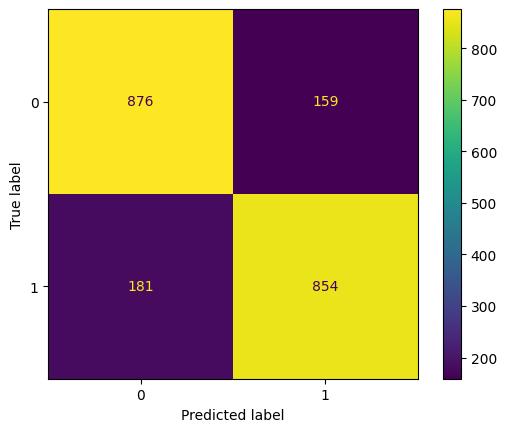

In [175]:
# Create the confusion matrix
cm = confusion_matrix(y_test, preds)

ConfusionMatrixDisplay(confusion_matrix=cm).plot();

In [176]:
print(classification_report(y_test, preds))

              precision    recall  f1-score   support

           0       0.83      0.85      0.84      1035
           1       0.84      0.83      0.83      1035

    accuracy                           0.84      2070
   macro avg       0.84      0.84      0.84      2070
weighted avg       0.84      0.84      0.84      2070

